### Principal Component Analysis – Simple Example¶
### We’re going to be utilizing a cancer dataset that is found within sklearn. We’re going to try to find what components are most important (show the most variance) in this dataset

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
#Import Data
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
dataset = cancer['data']
print(dataset)
#Some info about this dataset
print(cancer['DESCR'])
print(cancer['feature_names'])

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity 

In [34]:
print('Before standardization')
print('Mean:\n',dataset.mean(axis=0))
print('Standard deviation:\n',dataset.std(axis=0))

# Standardization
dataset_standardizated = (dataset - np.mean(dataset, axis=0)) / np.std(dataset, axis=0)

print('\nAfter standardization')
print('Mean:\n',dataset_standardizated.mean(axis=0))
print('Standard deviation:\n',dataset_standardizated.std(axis=0))

Before standardization
Mean:
 [1.41272917e+01 1.92896485e+01 9.19690334e+01 6.54889104e+02
 9.63602812e-02 1.04340984e-01 8.87993158e-02 4.89191459e-02
 1.81161863e-01 6.27976098e-02 4.05172056e-01 1.21685343e+00
 2.86605923e+00 4.03370791e+01 7.04097891e-03 2.54781388e-02
 3.18937163e-02 1.17961371e-02 2.05422988e-02 3.79490387e-03
 1.62691898e+01 2.56772232e+01 1.07261213e+02 8.80583128e+02
 1.32368594e-01 2.54265044e-01 2.72188483e-01 1.14606223e-01
 2.90075571e-01 8.39458172e-02]
Standard deviation:
 [3.52095076e+00 4.29725464e+00 2.42776193e+01 3.51604754e+02
 1.40517641e-02 5.27663291e-02 7.96497253e-02 3.87687325e-02
 2.73901809e-02 7.05415588e-03 2.77068942e-01 5.51163427e-01
 2.02007710e+00 4.54510134e+01 2.99987837e-03 1.78924359e-02
 3.01595231e-02 6.16486075e-03 8.25910439e-03 2.64374475e-03
 4.82899258e+00 6.14085432e+00 3.35730016e+01 5.68856459e+02
 2.28123569e-02 1.57198171e-01 2.08440875e-01 6.56745545e-02
 6.18130785e-02 1.80453893e-02]

After standardization
Mean:
 [

In [35]:
covariance_matrix = np.cov(dataset_standardizated.T)
covariance_matrix

array([[ 1.00176056e+00,  3.24351929e-01,  9.99612069e-01,
         9.89095475e-01,  1.70881506e-01,  5.07014640e-01,
         6.77955036e-01,  8.23976636e-01,  1.48001350e-01,
        -3.12179472e-01,  6.80285970e-01, -9.74887767e-02,
         6.75358538e-01,  7.37159198e-01, -2.22992026e-01,
         2.06362656e-01,  1.94545531e-01,  3.76831225e-01,
        -1.04504545e-01, -4.27163418e-02,  9.71245907e-01,
         2.97530545e-01,  9.66835698e-01,  9.42739295e-01,
         1.19826732e-01,  4.14190751e-01,  5.27839123e-01,
         7.45524434e-01,  1.64241985e-01,  7.07832563e-03],
       [ 3.24351929e-01,  1.00176056e+00,  3.30113223e-01,
         3.21650988e-01, -2.34296930e-02,  2.37118951e-01,
         3.02950254e-01,  2.93980713e-01,  7.15266864e-02,
        -7.65717560e-02,  2.76354360e-01,  3.87037830e-01,
         2.82169018e-01,  2.60302460e-01,  6.62542133e-03,
         1.92312595e-01,  1.43545353e-01,  1.64139495e-01,
         9.14323671e-03,  5.45533955e-02,  3.53193674e-

In [36]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
print('eigenvalues:\n',eigenvalues,'\n\neigenvectors:\n',eigenvectors)

eigenvalues:
 [1.33049908e+01 5.70137460e+00 2.82291016e+00 1.98412752e+00
 1.65163324e+00 1.20948224e+00 6.76408882e-01 4.77456255e-01
 4.17628782e-01 3.51310875e-01 2.94433153e-01 2.61621161e-01
 2.41782421e-01 1.57286149e-01 9.43006956e-02 8.00034045e-02
 5.95036135e-02 5.27114222e-02 4.95647002e-02 1.33279057e-04
 7.50121413e-04 1.59213600e-03 6.91261258e-03 8.19203712e-03
 1.55085271e-02 1.80867940e-02 2.43836914e-02 2.74877113e-02
 3.12142606e-02 3.00256631e-02] 

eigenvectors:
 [[ 2.18902444e-01 -2.33857132e-01 -8.53124284e-03  4.14089623e-02
  -3.77863538e-02  1.87407904e-02  1.24088340e-01  7.45229622e-03
  -2.23109764e-01  9.54864432e-02  4.14714866e-02  5.10674568e-02
   1.19672116e-02 -5.95061348e-02 -5.11187749e-02  1.50583883e-01
  -2.02924255e-01 -1.46712338e-01 -2.25384659e-01 -7.02414091e-01
   2.11460455e-01 -2.11194013e-01 -1.31526670e-01  1.29476396e-01
   1.92264989e-02 -1.82579441e-01  9.85526942e-02 -7.29289034e-02
  -4.96986642e-02  6.85700057e-02]
 [ 1.03724578

[0.443, 0.19, 0.094, 0.066, 0.055, 0.04, 0.023, 0.016, 0.014, 0.012, 0.01, 0.009, 0.008, 0.005, 0.003, 0.003, 0.002, 0.002, 0.002, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.0, 0.0, 0.0, 0.0, 0.0]


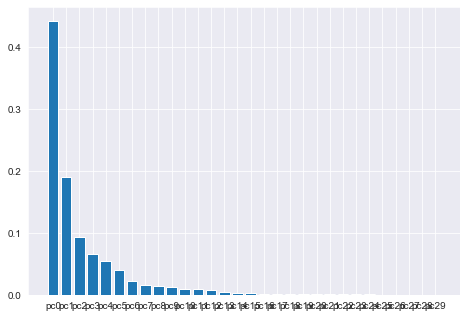

In [37]:
explained_variance = [round((i/np.sum(eigenvalues)), 3) for i in sorted(eigenvalues, reverse=True)]
print(explained_variance)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x_axis_labels = ['pc' + str(i) for i in np.arange(30)]
ax.bar(x_axis_labels,explained_variance)
plt.show()

Text(0, 0.5, 'Second Principal Component')

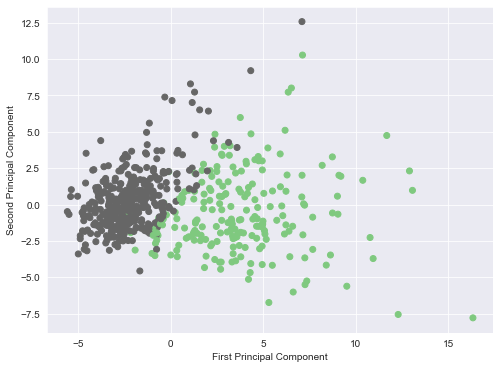

In [39]:
eigenpairs = [(np.abs(eigenvalues[i]), eigenvectors[:, i]) for i in range(len(eigenvalues))]
eigenpairs.sort(key = lambda k: k[0], reverse=True)

w = np.hstack((eigenpairs[0][1][:, np.newaxis],
               eigenpairs[1][1][:, np.newaxis]))

pc1 = dataset_standardizated.dot(w.T[0])
pc2 = dataset_standardizated.dot(w.T[1])

#Plot these
sns.set_style("darkgrid")

plt.figure(figsize=(8,6))
plt.scatter(pc1,pc2,c=cancer['target'],cmap='Accent')

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')